**LIBERAÇÃO DE NOVOS CRÉDITOS AOS CLIENTES**

### Sobre o projeto

Um escritório contábil, em nome de uma plataforma online de crédito da Alemanha nos contratou para fazer algumas análises e criar um modelo que identifica possíveis fraudadores.

Foi disponibilizado uma pequena amostra dos dados dos clientes porém, heterogênea o suficiente para traçar os perfis, as estratégias as análises e os modelos de detecção de fraude.

Tarefas:

* Realizar uma análise dos dados disponibilizados.
* Preparar os dados para geração de modelos de ML.
* Elaborar um algoritmo para proceder na liberação ou não de um novo empréstimo.


### 1. Importação dos dados

In [1]:
# Importação dos dados
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', 21) # Codigo para mostrar todas as colunas do dataset.
dados = pd.read_csv('https://raw.githubusercontent.com/joaovictordds/Modelo_de_Liberacao-Credito-II/main/german.csv')
dados.sample(3)

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,residencia,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
927,negativo,48,pagamento em dia,carro usado,10297,<100,"[4,7) anos",4,masculino/solteiro,nenhum,4,sem propriedades,39,lojas,de graça,3,nível 2,2,sim,não,mau
647,sem conta,12,pagamento em dia,carro novo,1386,[500-1000),"[1,4) anos",2,feminino/divorciado,nenhum,2,seguro de vida,26,nenhum,própria,1,nível 2,1,não,não,mau
502,200+,9,pagamento em dia,radio/televisão,1126,[100-500),> 7 anos,2,masculino/divorciado,nenhum,4,imobiliario,49,nenhum,própria,1,nível 2,1,não,não,bom


### 2. Pré Processamento

In [ ]:
dados['financiamentos'].value_counts()

nenhum    814
bancos    139
lojas      47
Name: financiamentos, dtype: int64

In [ ]:
dados['taxa'].value_counts()

4    476
2    231
3    157
1    136
Name: taxa, dtype: int64

In [ ]:
dados['residencia'].value_counts()

4    413
2    308
3    149
1    130
Name: residencia, dtype: int64

In [2]:
dados.describe(include='all')

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,residencia,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,2
top,sem conta,NaN,pagamento em dia,radio/televisão,NaN,<100,"[1,4) anos",NaN,masculino/solteiro,nenhum,NaN,carro,NaN,nenhum,própria,NaN,nível 2,NaN,não,não,bom
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


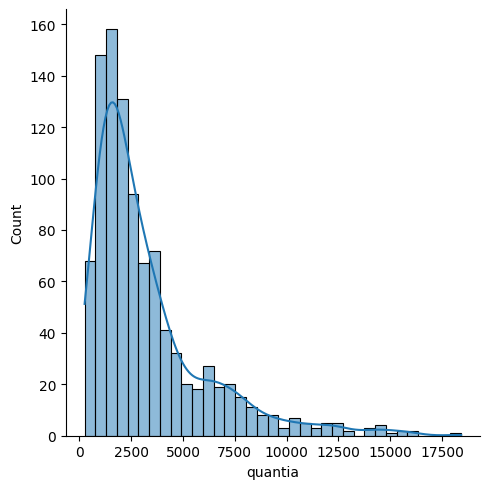

In [3]:
# visualizando com grafico com uma linha de suavização
import seaborn as sns
sns.displot(dados.quantia, kde=True);

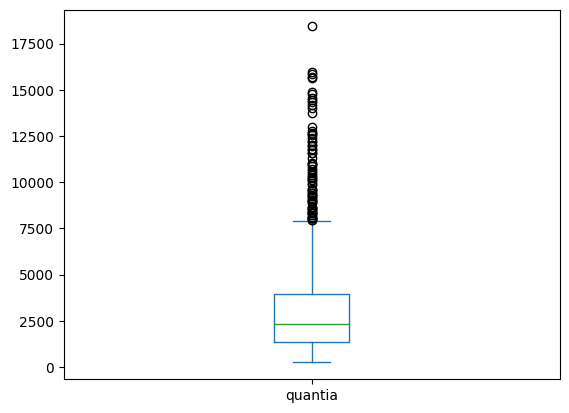

In [4]:
#Verificação de outliers
dados['quantia'].plot(kind='box');

In [5]:
dados[dados['quantia'] > 7500].describe()

,duração,quantia,taxa,residencia,idade,creditos,dependentes
count,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,37.44186,10416.872093,2.290698,2.895349,36.139535,1.453488,1.162791
std,12.55445,2544.547743,1.083201,1.084968,10.899717,0.626042,0.371340
min,6.00000,7511.000000,1.000000,1.000000,21.000000,1.000000,1.000000
25%,30.00000,8322.250000,1.250000,2.000000,27.000000,1.000000,1.000000
50%,36.00000,9600.500000,2.000000,3.000000,34.500000,1.000000,1.000000
75%,48.00000,11983.000000,3.000000,4.000000,42.750000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,68.000000,4.000000,2.000000


In [19]:
#df['conta'].value_counts()
#df['historico'].value_counts()
#df['poupança'].value_counts()
#df['emprego'].value_counts()
#df['garantia'].value_counts()
#df['propriedades'].value_counts()
#df['financiamentos'].value_counts()
#df['moradia'].value_counts()
#df['trabalho'].value_counts()
#df['pagador'].value_counts()
#dados['emprego'].value_counts()
dados['status'].value_counts()

masculino/solteiro      548
feminino/divorciado     310
masculino/casado         92
masculino/divorciado     50
Name: status, dtype: int64

In [6]:
# Substituindo os valores da coluna 'conta'
dados['conta']=dados['conta'].replace('[0-200)','ate 200')
# Subst os valores da coluna 'poupança'
dados['poupança'] = dados['poupança'].replace(['<100','[100-500)','[500-1000)','>1000'],['ate 100','100 a mil','100 a mil','+1k'])
# Subs. a variavel alvo para booleano
dados['pagador'] = dados['pagador'].replace(['bom','mau'],[1,0])
# Subs dados var. Emprego
dados['emprego'] = dados['emprego'].replace(['[1,4) anos','> 7 anos','[4,7) anos','< 1 ano'],['de 1 a 4 anos','+7 anos','de 4 a 7 anos','menos de 1 ano'])
# Subs. dados de estado civil
dados['status'] = dados['status'].replace(['masculino/solteiro','feminino/divorciado','masculino/casado','masculino/divorciado'],['masculino','feminino','masculino','feminino'])

In [21]:
dados.sample(8)

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,residencia,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
240,negativo,24,pagamento em dia,carro novo,915,sem conta,+7 anos,4,feminino,nenhum,2,carro,29,bancos,própria,1,nível 2,1,não,não,0
123,200+,10,conta crítica,carro novo,781,ate 100,+7 anos,4,masculino,nenhum,4,sem propriedades,63,nenhum,de graça,2,nível 2,1,sim,não,1
393,negativo,6,conta crítica,radio/televisão,1957,ate 100,de 4 a 7 anos,1,feminino,nenhum,4,carro,31,nenhum,própria,1,nível 2,1,não,não,1
38,200+,10,pagamento em dia,itens de casa,1225,ate 100,de 1 a 4 anos,2,masculino,nenhum,2,carro,37,nenhum,própria,1,nível 2,1,sim,não,1
176,negativo,12,pagamento em dia,móveis,2577,ate 100,de 1 a 4 anos,2,feminino,nenhum,1,carro,42,nenhum,própria,1,nível 2,1,não,não,1
264,sem conta,10,conta crítica,carro novo,1231,ate 100,+7 anos,3,masculino,nenhum,4,imobiliario,32,nenhum,própria,2,nível 1,2,não,sim,1
980,ate 200,30,conta crítica,móveis,8386,ate 100,de 4 a 7 anos,2,masculino,nenhum,2,seguro de vida,49,nenhum,própria,1,nível 2,1,não,não,0
623,negativo,12,pagamento em dia,móveis,1858,ate 100,menos de 1 ano,4,feminino,nenhum,1,carro,22,nenhum,alugada,1,nível 2,1,não,não,1


### 3. ANALISE EXPLORATÓRIA

#### 2.1 Acesso ao relátorio simplificado das variáveis

In [ ]:
# Breve análise de dados automática
!pip install sweetviz

In [22]:
import sweetviz as sv
eda= sv.analyze(dados, target_feat='pagador')
eda.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### 2.2 ANÁLISE EXPLORATÓRIA DOS DADOS